# Диплом 2024 Chernaya Natalya GeekBrains


### Содержание:
- [Установка пакетов](#inst_)
- [Импорт библиотек](#libr_)
- [Загрузка данных](#load_data_)
  - [Описание данных](#description_)
- [Предварительный анализ данных](#pad_)
  - [Общая информация о DataFrame](#dinfo_)
  - [Проверка пропусков данных](#pass_)
  - [Обзор базовой статистики](#statis_)
  - [Уникальные значения в категориальных столбцах](#unvalues_)
  - [Посмотрим корреляцию между числовыми столбцами](#corr_)
  - [Проверка дубликатов](#duplicate_) 
  - [Распределение категориальных данных](#categorical_features_)
  - [Анализ ценового диапазона](#pricerange_)
  - [Анализ географического распределения](#geograph_)
  - [Наиболее популярные кухни](#popular_cuisines_)
  - [Временной анализ](#time_data_)
  - [Визуализируем анализ данных DataFrame](#df_visual_)
- [Удаление пропущенных значений и заполнение средним или специальным значением](#del_)
- [Проверка выбросов в ценах](#emission_)
- [Классификация ресторанов по ценовому диапазону](#classification_price_)
- [Дополнительная проверка](#additional_check_)
  - [Проверим методом кросс-валидации](#cross_val_)
  - [Оценим качество работы метрикой Cohen.s Kappa для учета случайного угадывания](#metrika_Cohen_)
  - [Confusion Matrix для визуальной оценки ошибок](#metrika_Matrix_)
- [Рекомендательная система для ресторанов](#recommendation_system_)
- [Визуализируем распределение ресторанов по координатам и ценам](#distribute_of_restaurants_)
- [Создаем интерактивную карту для анализа расположения ресторанов](#interactive_map_)
- [Поиск скрытых зависимостей с использованием корреляционного анализа и метода главных компонентов (PCA)](#hidden_dependencies_)
- [Заключение](#vivod_)

### Установка пакетов <a class='anchor' id='inst_'>

In [1]:
# !pip install pandas numpy matplotlib seaborn scikit-learn folium ipython

### Импорт библиотек <a class='anchor' id='libr_'>

In [2]:
# Работа с таблицами данных
import pandas as pd
# Работа с массивами чисел и линейной алгеброй
import numpy as np
# Визуализация данных. Создание графиков, диаграмм и других видов визуализаций
import matplotlib.pyplot as plt
# Расширение для matplotlib, которое упрощает создание сложных графиков с помощью высокоуровневых интерфейсов и стилевого оформления.
import seaborn as sns
# Алгоритм кластеризации, который разделяет данные на кластеры на основе схожести между объектами
from sklearn.cluster import KMeans
# Преобразование данных к стандартному виду
from sklearn.preprocessing import StandardScaler
# Метод главных компонентов (PCA) для уменьшения размерности данных
from sklearn.decomposition import PCA
# Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
# Классификатор на основе ансамблевых методов, таких как случайный лес
from sklearn.ensemble import RandomForestClassifier
# Оценка качества модели
from sklearn.metrics import classification_report

# Стратифицированная кросс-валидация для оценки модели
from sklearn.model_selection import StratifiedKFold
# Вычисление косинусной близости между векторами
from sklearn.metrics.pairwise import cosine_similarity

# Используем стратифицированную кросс-валидацию
from sklearn.model_selection import cross_val_score
# Вычисление коэффициента Кappa для оценки качества классификации
from sklearn.metrics import cohen_kappa_score
# Confusion Matrix для визуальной оценки ошибок
from sklearn.metrics import confusion_matrix
# Библиотека для создания интерактивных карт
import folium
# Плагин для отображения маркеров на карте
from folium.plugins import MarkerCluster
# Библиотека для открытия веб-страниц в браузере
import webbrowser
# Библиотека для работы с операционной системой
import os

# Метрика Cohen's Kappa для учета случайного угадывания
from sklearn.metrics import cohen_kappa_score
# Confusion Matrix для визуальной оценки ошибок
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Настройка формата вывода чисел float
pd.set_option('display.float_format', '{:.2f}'.format)

# Отображение изображений в ноутбуке
from IPython.display import Image

### Загрузка данных <a class='anchor' id='load_data_'>

Описание данных: <a class='anchor' id='description_'> 
1. Этот набор данных находится на сайте по адресу:       https://www.kaggle.com/datasets/datafiniti/vegetarian-vegan-restaurants/data
2. Этот набор данных представляет собой список из более чем 200 ресторанов США и их 10 000 веганских или вегетарианских позиций меню из бизнес-базы данных Datafiniti, обновленной в период с января 2018 года по сентябрь 2018 года. 
3. Набор данных включает адрес, город, штат, название компании, бизнес-категории, данные меню, номера телефонов и многое другое. 
4. Каждый бизнес-листинг включает тип диеты веганский или вегетарианский в поле Кухни, в нем будет запись для каждого найденного для него пункта меню, а в некоторых компаниях может быть несколько записей. 

In [3]:
# Загрузка данных
df = pd.read_csv('dataset/Datafiniti_Vegetarian_and_Vegan_Restaurants.csv')

In [4]:
# Обзор данных
df.head()

id             dateAdded           dateUpdated  \
0  AVwd3yXEkufWRAb59-sH  2016-04-22T02:47:48Z  2018-09-10T21:00:49Z   
1  AVwd3yXEkufWRAb59-sH  2016-04-22T02:47:48Z  2018-09-10T21:00:49Z   
2  AVwd3yXEkufWRAb59-sH  2016-04-22T02:47:48Z  2018-09-10T21:00:49Z   
3  AVwd3yXEkufWRAb59-sH  2016-04-22T02:47:48Z  2018-09-10T21:00:49Z   
4  AVwd3yXEkufWRAb59-sH  2016-04-22T02:47:48Z  2018-09-10T21:00:49Z   

              address                                         categories  \
0  1045 San Pablo Ave  Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...   
1  1045 San Pablo Ave  Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...   
2  1045 San Pablo Ave  Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...   
3  1045 San Pablo Ave  Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...   
4  1045 San Pablo Ave  Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...   

               primaryCategories    city claimed country  \
0  Accommodation & Food Services  Albany     NaN      US   
1  Accommodation & Food Services  Albany     NaN      US   
2  Accommodation & Food Services  Albany     NaN      US   
3  Accommodation & Food Services  Albany     NaN      US   
4  Accommodation & Food Services  Albany     NaN      US   

                        cuisines  ...  postalCode  priceRangeCurrency  \
0  Thai,Asian/Pacific,Vegetarian  ...       94706                 NaN   
1  Thai,Asian/Pacific,Vegetarian  ...       94706                 NaN   
2  Thai,Asian/Pacific,Vegetarian  ...       94706                 NaN   
3  Thai,Asian/Pacific,Vegetarian  ...       94706                 NaN   
4  Thai,Asian/Pacific,Vegetarian  ...       94706                 NaN   

   priceRangeMin priceRangeMax  province  sic  \
0            NaN           NaN        CA  NaN   
1            NaN           NaN        CA  NaN   
2            NaN           NaN        CA  NaN   
3            NaN           NaN        CA  NaN   
4            NaN           NaN        CA  NaN   

                                          sourceURLs  twitter  \
0  https://foursquare.com/v/potala-organic-cafe/4...      NaN   
1  https://foursquare.com/v/potala-organic-cafe/4...      NaN   
2  https://foursquare.com/v/potala-organic-cafe/4...      NaN   
3  https://foursquare.com/v/potala-organic-cafe/4...      NaN   
4  https://foursquare.com/v/potala-organic-cafe/4...      NaN   

                                 websites yearOpened  
0  http://www.potala.us/,http://potala.us        NaN  
1  http://www.potala.us/,http://potala.us        NaN  
2  http://www.potala.us/,http://potala.us        NaN  
3  http://www.potala.us/,http://potala.us        NaN  
4  http://www.potala.us/,http://potala.us        NaN  

[5 rows x 47 columns]

In [5]:
# Обзор размера
df.shape

(10000, 47)

### Предварительный анализ данных <a class='anchor' id='pad_'>

#### Общая информация о DataFrame <a class='anchor' id='dinfo_'>

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10000 non-null  object 
 1   dateAdded                10000 non-null  object 
 2   dateUpdated              10000 non-null  object 
 3   address                  10000 non-null  object 
 4   categories               10000 non-null  object 
 5   primaryCategories        10000 non-null  object 
 6   city                     10000 non-null  object 
 7   claimed                  689 non-null    object 
 8   country                  10000 non-null  object 
 9   cuisines                 10000 non-null  object 
 10  descriptions.dateSeen    0 non-null      float64
 11  descriptions.sourceURLs  0 non-null      float64
 12  descriptions.value       0 non-null      float64
 13  facebookPageURL          937 non-null    object 
 14  features.key           

#### Проверка пропусков данных <a class='anchor' id='pass_'>

In [7]:
print(df.isnull().sum(axis=0))

id                             0
dateAdded                      0
dateUpdated                    0
address                        0
categories                     0
primaryCategories              0
city                           0
claimed                     9311
country                        0
cuisines                       0
descriptions.dateSeen      10000
descriptions.sourceURLs    10000
descriptions.value         10000
facebookPageURL             9063
features.key               10000
features.value             10000
hours.day                  10000
hours.dept                 10000
hours.hour                 10000
imageURLs                   4866
isClosed                    9963
keys                           0
languagesSpoken            10000
latitude                       0
longitude                      0
menuPageURL                    0
menus.amountMax                0
menus.amountMin                0
menus.category              4070
menus.currency                53
menus.date

#### Обзор базовой статистики <a class='anchor' id='statis_'>

In [8]:
df.describe()

descriptions.dateSeen  descriptions.sourceURLs  descriptions.value  \
count                   0.00                     0.00                0.00   
mean                     NaN                      NaN                 NaN   
std                      NaN                      NaN                 NaN   
min                      NaN                      NaN                 NaN   
25%                      NaN                      NaN                 NaN   
50%                      NaN                      NaN                 NaN   
75%                      NaN                      NaN                 NaN   
max                      NaN                      NaN                 NaN   

       features.key  features.value  hours.day  hours.dept  hours.hour  \
count          0.00            0.00       0.00        0.00        0.00   
mean            NaN             NaN        NaN         NaN         NaN   
std             NaN             NaN        NaN         NaN         NaN   
min             NaN             NaN        NaN         NaN         NaN   
25%             NaN             NaN        NaN         NaN         NaN   
50%             NaN             NaN        NaN         NaN         NaN   
75%             NaN             NaN        NaN         NaN         NaN   
max             NaN             NaN        NaN         NaN         NaN   

       languagesSpoken  latitude  longitude  menus.amountMax  menus.amountMin  \
count             0.00  10000.00   10000.00         10000.00         10000.00   
mean               NaN     38.90     -85.14            12.64            12.55   
std                NaN      4.72      17.51            39.54            39.53   
min                NaN     20.73    -156.45             0.00             0.00   
25%                NaN     37.80     -87.98             4.00             4.00   
50%                NaN     40.73     -74.00             7.00             7.00   
75%                NaN     40.76     -73.98            10.95            10.95   
max                NaN     47.68     -69.72          2500.00          2500.00   

       priceRangeMin  priceRangeMax     sic  yearOpened  
count        6327.00        6327.00  140.00       91.00  
mean           21.41          39.21 5874.20     2015.00  
std            14.42          10.54  960.91        0.00  
min             0.00          12.00 4773.00     2015.00  
25%             0.00          25.00 5610.00     2015.00  
50%            25.00          40.00 5610.00     2015.00  
75%            25.00          40.00 5610.00     2015.00  
max            40.00          55.00 8129.00     2015.00

#### Уникальные значения в категориальных столбцах <a class='anchor' id='unvalues_'>

In [9]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nУникальные значения в столбце {col}:")
    print(df[col].value_counts().head())


Уникальные значения в столбце id:
AV0BJkuP-gnIPe8DUvYQ    375
AVweaMjhByjofQCxx7-_    310
AVwc8zhtByjofQCxj89O    308
AVzA19T-FcQ3k02bBX1q    265
AVzBGDbxFcQ3k02bBeXU    217
Name: id, dtype: int64

Уникальные значения в столбце dateAdded:
2017-10-18T16:27:40Z    560
2017-07-02T02:34:33Z    375
2016-05-07T01:38:40Z    310
2017-10-18T16:27:37Z    309
2016-03-22T03:41:04Z    308
Name: dateAdded, dtype: int64

Уникальные значения в столбце dateUpdated:
2018-07-19T21:03:58Z    375
2018-08-26T17:07:43Z    310
2018-04-14T09:50:33Z    308
2018-07-19T21:05:13Z    265
2018-07-19T20:48:18Z    219
Name: dateUpdated, dtype: int64

Уникальные значения в столбце address:
311 W 43rd St      375
102 8th Ave        310
410 SW Broadway    308
24 Pell St         265
146 6th St         217
Name: address, dtype: int64

Уникальные значения в столбце categories:
Chinese Restaurant,Restaurant,Cocktails,Vegetarian,Dim Sum,Chinese,Dim Sum Restaurant                                                               

Выведем отдельно уникальные значения в столбце name. Это помогает увидеть, какие рестораны являются сетевыми (имеют много повторений) и сколько всего уникальных брендов ресторанов представлено в данных.

In [10]:
# Подсчет количества повторений каждого названия ресторана
restaurant_counts = df['name'].value_counts()

# Вывод результатов
print("Название ресторана и их количество (филиалы)")
print(restaurant_counts)

# Количество уникальных названий ресторанов
unique_restaurants = restaurant_counts.shape[0]
print(f"\nВсего уникальных названий ресторанов: {unique_restaurants}")

Название ресторана и их количество (филиалы)
Hakkasan                          375
Liquiteria                        310
Imperial                          308
Vegetarian Dim Sum House          265
Six Penn Kitchen                  217
                                 ... 
Stinky's Fish Camp                  3
Vegetarian Restaurant by Hakin      2
Nice China Town                     1
Tuscan Grill                        1
David Magen Pizza                   1
Name: name, Length: 209, dtype: int64

Всего уникальных названий ресторанов: 209


#### Посмотрим корреляцию между числовыми столбцами <a class='anchor' id='corr_'>

In [11]:
# Выбираем только числовые столбцы
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Вычисляем корреляцию
correlation_matrix = df[numeric_columns].corr()
print("\nКорреляция между числовыми столбцами:")
correlation_matrix


Корреляция между числовыми столбцами:


descriptions.dateSeen  descriptions.sourceURLs  \
descriptions.dateSeen                      NaN                      NaN   
descriptions.sourceURLs                    NaN                      NaN   
descriptions.value                         NaN                      NaN   
features.key                               NaN                      NaN   
features.value                             NaN                      NaN   
hours.day                                  NaN                      NaN   
hours.dept                                 NaN                      NaN   
hours.hour                                 NaN                      NaN   
languagesSpoken                            NaN                      NaN   
latitude                                   NaN                      NaN   
longitude                                  NaN                      NaN   
menus.amountMax                            NaN                      NaN   
menus.amountMin                            NaN                      NaN   
priceRangeMin                              NaN                      NaN   
priceRangeMax                              NaN                      NaN   
sic                                        NaN                      NaN   
yearOpened                                 NaN                      NaN   

                         descriptions.value  features.key  features.value  \
descriptions.dateSeen                   NaN           NaN             NaN   
descriptions.sourceURLs                 NaN           NaN             NaN   
descriptions.value                      NaN           NaN             NaN   
features.key                            NaN           NaN             NaN   
features.value                          NaN           NaN             NaN   
hours.day                               NaN           NaN             NaN   
hours.dept                              NaN           NaN             NaN   
hours.hour                              NaN           NaN             NaN   
languagesSpoken                         NaN           NaN             NaN   
latitude                                NaN           NaN             NaN   
longitude                               NaN           NaN             NaN   
menus.amountMax                         NaN           NaN             NaN   
menus.amountMin                         NaN           NaN             NaN   
priceRangeMin                           NaN           NaN             NaN   
priceRangeMax                           NaN           NaN             NaN   
sic                                     NaN           NaN             NaN   
yearOpened                              NaN           NaN             NaN   

                         hours.day  hours.dept  hours.hour  languagesSpoken  \
descriptions.dateSeen          NaN         NaN         NaN              NaN   
descriptions.sourceURLs        NaN         NaN         NaN              NaN   
descriptions.value             NaN         NaN         NaN              NaN   
features.key                   NaN         NaN         NaN              NaN   
features.value                 NaN         NaN         NaN              NaN   
hours.day                      NaN         NaN         NaN              NaN   
hours.dept                     NaN         NaN         NaN              NaN   
hours.hour                     NaN         NaN         NaN              NaN   
languagesSpoken                NaN         NaN         NaN              NaN   
latitude                       NaN         NaN         NaN              NaN   
longitude                      NaN         NaN         NaN              NaN   
menus.amountMax                NaN         NaN         NaN              NaN   
menus.amountMin                NaN         NaN         NaN              NaN   
priceRangeMin                  NaN         NaN         NaN              NaN   
priceRangeMax                  NaN         NaN         NaN              NaN   
sic                    

#### Проверка дубликатов <a class='anchor' id='duplicate_'>

In [12]:
print(f"\nКоличество дубликатов: {df.duplicated().sum()}")


Количество дубликатов: 0


#### Распределение категориальных данных <a class='anchor' id='categorical_features_'>

In [13]:
for col in ['city', 'country', 'primaryCategories']:
    print(f"\nРаспределение {col}:")
    print(df[col].value_counts(normalize=True).head() * 100)


Распределение city:
New York    33.95
Brooklyn    11.88
Portland     3.16
Chicago      2.65
Charlotte    2.32
Name: city, dtype: float64

Распределение country:
US   100.00
Name: country, dtype: float64

Распределение primaryCategories:
Accommodation & Food Services                                 92.48
Wholesale Trade,Accommodation & Food Services,Manufacturing    3.10
Wholesale Trade,Accommodation & Food Services                  1.88
Retail                                                         1.69
Arts Entertainment & Recreation                                0.65
Name: primaryCategories, dtype: float64


#### Анализ ценового диапазона <a class='anchor' id='pricerange_'>

In [14]:
print("\nСтатистика по ценовому диапазону:")
df[['priceRangeMin', 'priceRangeMax']].describe()


Статистика по ценовому диапазону:


priceRangeMin  priceRangeMax
count        6327.00        6327.00
mean           21.41          39.21
std            14.42          10.54
min             0.00          12.00
25%             0.00          25.00
50%            25.00          40.00
75%            25.00          40.00
max            40.00          55.00

#### Анализ географического распределения <a class='anchor' id='geograph_'>

In [15]:
print("\nТоп-10 городов по количеству ресторанов:")
print(df['city'].value_counts().head(10))


Топ-10 городов по количеству ресторанов:
New York           3395
Brooklyn           1188
Portland            316
Chicago             265
Charlotte           232
Pittsburgh          232
Houston             230
Miami               209
Jackson Heights     186
Seattle             169
Name: city, dtype: int64


#### Наиболее популярные кухни <a class='anchor' id='popular_cuisines_'>

In [16]:
cuisines = df['cuisines'].str.split(',', expand=True).stack().value_counts()
print("\nТоп-10 популярных кухонь:")
print(cuisines.head(10))


Топ-10 популярных кухонь:
Vegetarian             8089
Vegan                  1668
Indian                 1538
Vegetarian Friendly    1268
Vegan Options          1232
American               1173
Healthy                1004
Gluten Free Options     988
Chinese                 893
Local/Organic           750
dtype: int64


#### Временной анализ <a class='anchor' id='time_data_'>

In [17]:
df['dateAdded'] = pd.to_datetime(df['dateAdded'])
print("\nВременной диапазон данных:")
print(f"Начало: {df['dateAdded'].min()}")
print(f"Конец: {df['dateAdded'].max()}")
print("\nКоличество ресторанов по годам:")
print(df['dateAdded'].dt.year.value_counts().sort_index())


Временной диапазон данных:
Начало: 2014-01-06 05:32:50+00:00
Конец: 2018-05-12 05:33:10+00:00

Количество ресторанов по годам:
2014      73
2015    1206
2016    3097
2017    5239
2018     385
Name: dateAdded, dtype: int64


Резкое увеличение количества ресторанов в 2015–2017 годах, что привело к закрытию менее конкурентоспособных заведений. Также в то время многие традиционные рестораны начали внедрять веганские и вегетарианские опции в свои меню, что создало серьезную конкуренцию для специализированных заведений. Это могло привести к снижению их посещаемости и, как следствие, к закрытию некоторых из них. Некоторые известные веганские рестораны, такие как "Plant Food + Wine" шеф-повара Мэтью Кенни, закрылись из-за финансовых трудностей и проблем с арендой. Это свидетельствует о том, что даже популярные заведения сталкивались с трудностями, что могло повлиять на общую динамику рынка.

#### Визуализируем анализ данных DataFrame <a class='anchor' id='df_visual_'>

In [18]:
# Для выполнения кластеризации ресторанов по координатам добавим новый столбец 'cluster' в DataFrame df
coords = df[['latitude', 'longitude']].dropna()
kmeans = KMeans(n_clusters=5, random_state=42)
df.loc[coords.index, 'cluster'] = kmeans.fit_predict(coords)

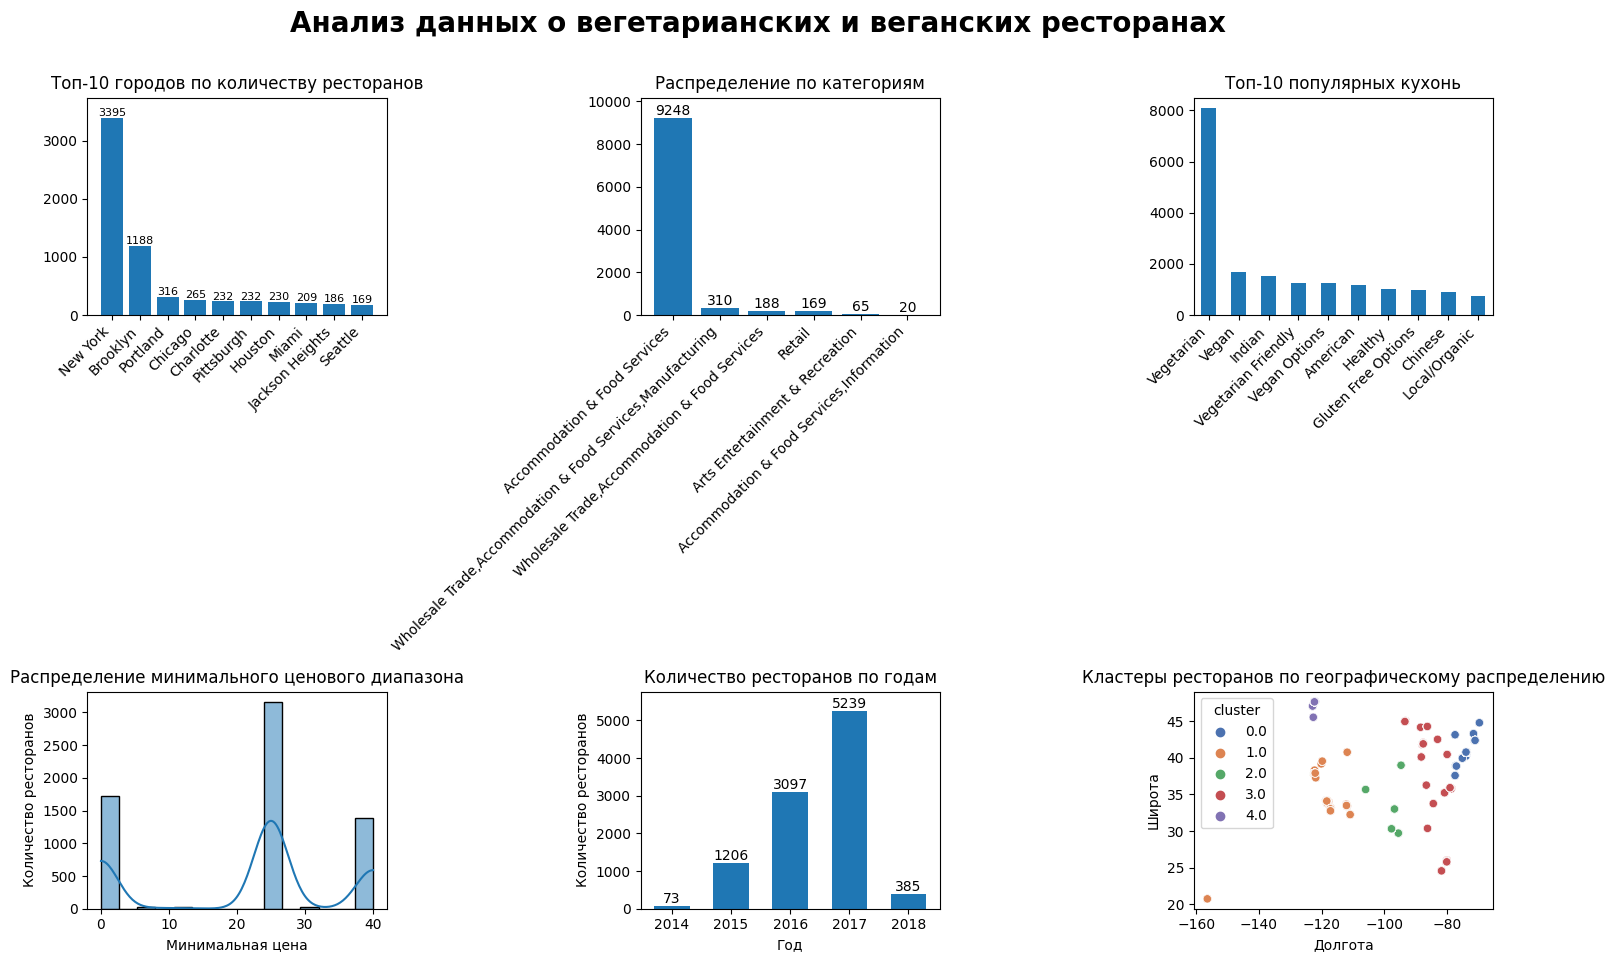

In [19]:
def visualize_analysis(df):
    plt.figure(figsize=(15, 15))
    plt.suptitle('Анализ данных о вегетарианских и веганских ресторанах', y=1.005, fontsize=20, fontweight='bold')

    # 1. Распределение городов
    plt.subplot(3, 3, 1)
    city_counts = df['city'].value_counts().head(10)
    bars = plt.bar(city_counts.index, city_counts.values)
    plt.title('Топ-10 городов по количеству ресторанов', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Добавление подписей значений над столбцами
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height}',
                ha='center', va='bottom', fontsize=8)

    # Увеличим верхний предел оси Y для лучшего отображения подписей
    plt.ylim(0, max(city_counts.values) * 1.1)  # 10% запас сверху


    # 2. Распределение городов
    plt.subplot(3, 3, 2)
    category_counts = df['primaryCategories'].value_counts().head(10)
    bars = plt.bar(category_counts.index, category_counts.values)
    plt.title('Распределение по категориям', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Добавление подписей значений над столбцами
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height}',
                ha='center', va='bottom')

    # Увеличим верхний предел оси Y для лучшего отображения подписей
    plt.ylim(0, max(category_counts.values) * 1.1)  # 10% запас сверху


    # 3. Популярные кухни
    plt.subplot(3, 3, 3)
    cuisines = df['cuisines'].str.split(',', expand=True).stack().value_counts()
    cuisines.head(10).plot(kind='bar')
    plt.title('Топ-10 популярных кухонь', fontsize=12)
    plt.xticks(rotation=45, ha='right')


    # 4. Распределение ценового диапазона
    plt.subplot(3, 3, 4)
    sns.histplot(df['priceRangeMin'].dropna(), kde=True)
    plt.title('Распределение минимального ценового диапазона', fontsize=12)
    plt.xlabel('Минимальная цена')
    plt.ylabel('Количество ресторанов')
    

    # 5. Количество ресторанов по датам
    plt.subplot(3, 3, 5)
    df['dateAdded'] = pd.to_datetime(df['dateAdded'])
    year_counts = df['dateAdded'].dt.year.value_counts().sort_index()
        
    plt.bar(year_counts.index, year_counts.values, width=0.6)
    plt.title('Количество ресторанов по годам')
    plt.xlabel('Год')
    plt.ylabel('Количество ресторанов')
        
    # Настройка оси X
    plt.xticks(year_counts.index)
        
    # Добавление подписей значений над столбцами
    for i, v in enumerate(year_counts.values):
        plt.text(year_counts.index[i], v, str(v), ha='center', va='bottom')
        
    # Настройка диапазона оси Y для лучшего отображения
    plt.ylim(0, max(year_counts.values) * 1.1)  # 10% запас сверху


    #6 Карта кластеров ресторанов по географическому распределению
    plt.subplot(3, 3, 6)
    sns.scatterplot(data=df, x='longitude', y='latitude', hue='cluster', palette='deep')
    plt.title('Кластеры ресторанов по географическому распределению')  
    plt.xlabel('Долгота')
    plt.ylabel('Широта')  

    
    plt.tight_layout()
    plt.savefig('pic/restaurant_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()



# Визуализация результатов
visualize_analysis(df)

### Удаление пропущенных значений и заполнение средним или специальным значением <a class='anchor' id='del_'>

In [20]:
# Для категориальных данных заполняем пропуски наиболее частым значением
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [21]:
# Для булевых столбцов заполняем пропуски False:
df['claimed'].fillna(False, inplace=True)

In [22]:
# Для URL-адресов и других строковых данных заполняем пропуски пустой строкой или специальным значением
df['facebookPageURL'].fillna('', inplace=True)
df['twitter'].fillna('No Twitter', inplace=True)

In [23]:
# Для языков указываем на местный язык:
df['languagesSpoken'].fillna(df['country'], inplace=True)

In [24]:
# Проверим, остались ли пропущенные значения
print(df.isnull().sum())

id                             0
dateAdded                      0
dateUpdated                    0
address                        0
categories                     0
primaryCategories              0
city                           0
claimed                        0
country                        0
cuisines                       0
descriptions.dateSeen      10000
descriptions.sourceURLs    10000
descriptions.value         10000
facebookPageURL                0
features.key               10000
features.value             10000
hours.day                  10000
hours.dept                 10000
hours.hour                 10000
imageURLs                      0
isClosed                       0
keys                           0
languagesSpoken                0
latitude                       0
longitude                      0
menuPageURL                    0
menus.amountMax                0
menus.amountMin                0
menus.category                 0
menus.currency                 0
menus.date

In [25]:
# Удалим столбцы, так в них отсутствуют значения
columns_to_drop = ['descriptions.value', 'descriptions.dateSeen', 'descriptions.sourceURLs', 'features.key', 'features.value', 
                   'hours.day', 'hours.dept', 'hours.hour']
ds = df.drop(columns=columns_to_drop)

In [26]:
# Заменим пустые значения в столбце 'yearOpened' значениями из столбца 'dateAdded' с помощью временного столбца 'year_from_dateAdded'
# Преобразуем 'dateAdded' в datetime, если это еще не сделано
ds['dateAdded'] = pd.to_datetime(ds['dateAdded'])

# Извлекаем год из 'dateAdded'
ds['year_from_dateAdded'] = ds['dateAdded'].dt.year

# Заполняем пропуски в 'yearOpened' значениями из 'year_from_dateAdded'
ds['yearOpened'] = ds['yearOpened'].fillna(ds['year_from_dateAdded'])

# Преобразуем 'yearOpened' в целочисленный тип
ds['yearOpened'] = ds['yearOpened'].astype(int)

# Удаляем временный столбец 'year_from_dateAdded'
ds = ds.drop('year_from_dateAdded', axis=1)

# Проверяем результат
print(ds[['yearOpened', 'dateAdded']].head(10))
print("\nКоличество пропущенных значений в 'yearOpened':", ds['yearOpened'].isnull().sum())

   yearOpened                 dateAdded
0        2016 2016-04-22 02:47:48+00:00
1        2016 2016-04-22 02:47:48+00:00
2        2016 2016-04-22 02:47:48+00:00
3        2016 2016-04-22 02:47:48+00:00
4        2016 2016-04-22 02:47:48+00:00
5        2016 2016-03-24 10:25:20+00:00
6        2016 2016-03-24 10:25:20+00:00
7        2016 2016-03-24 10:25:20+00:00
8        2016 2016-03-24 10:25:20+00:00
9        2016 2016-03-24 10:25:20+00:00

Количество пропущенных значений в 'yearOpened': 0


In [27]:
# Для столбцов 'priceRangeMin', 'priceRangeMax' применили медианный способ
median_price_min = ds['priceRangeMin'].median()
median_price_max = ds['priceRangeMax'].median()
# Применяем выбранный метод
ds['priceRangeMin'] = ds['priceRangeMin'].fillna(median_price_min)
ds['priceRangeMax'] = ds['priceRangeMax'].fillna(median_price_max)

In [28]:
print("Данные по столбцу 'priceRangeMax'")
print(ds['priceRangeMax'])
print("\nДанные по столбцу 'priceRangeMin'")
print(ds['priceRangeMin'])

Данные по столбцу 'priceRangeMax'
0      40.00
1      40.00
2      40.00
3      40.00
4      40.00
        ... 
9995   55.00
9996   55.00
9997   55.00
9998   55.00
9999   55.00
Name: priceRangeMax, Length: 10000, dtype: float64

Данные по столбцу 'priceRangeMin'
0      25.00
1      25.00
2      25.00
3      25.00
4      25.00
        ... 
9995   40.00
9996   40.00
9997   40.00
9998   40.00
9999   40.00
Name: priceRangeMin, Length: 10000, dtype: float64


In [29]:
# Проверим, остались ли пропущенные значения
print(ds.isnull().sum())

id                       0
dateAdded                0
dateUpdated              0
address                  0
categories               0
primaryCategories        0
city                     0
claimed                  0
country                  0
cuisines                 0
facebookPageURL          0
imageURLs                0
isClosed                 0
keys                     0
languagesSpoken          0
latitude                 0
longitude                0
menuPageURL              0
menus.amountMax          0
menus.amountMin          0
menus.category           0
menus.currency           0
menus.dateSeen           0
menus.description        0
menus.name               0
menus.sourceURLs         0
name                     0
paymentTypes             0
phones                   0
postalCode               0
priceRangeCurrency       0
priceRangeMin            0
priceRangeMax            0
province                 0
sic                   9860
sourceURLs               0
twitter                  0
w

### Проверка выбросов в ценах <a class='anchor' id='emission_'>

In [30]:
Q1 = ds['priceRangeMin'].quantile(0.25)
Q3 = ds['priceRangeMin'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ds[(ds['priceRangeMin'] < lower_bound) | (ds['priceRangeMin'] > upper_bound)]
print(f"Количество выбросов: {len(outliers)}")
print(outliers[['name', 'city', 'priceRangeMin']].head(10))

Количество выбросов: 3168
          name      city  priceRangeMin
76  Liquiteria  New York           0.00
77  Liquiteria  New York           0.00
78  Liquiteria  New York           0.00
79  Liquiteria  New York           0.00
80  Liquiteria  New York           0.00
81  Liquiteria  New York           0.00
82  Liquiteria  New York           0.00
83  Liquiteria  New York           0.00
84  Liquiteria  New York           0.00
85  Liquiteria  New York           0.00


В выбросах мы видем очень много записей с нулевыми значениями, проверим сколько их.

In [31]:
# Подсчет нулевых значений:
zero_prices = ds[ds['priceRangeMin'] == 0]
print(f"Количество записей с нулевой ценой: {len(zero_prices)}")
print(f"Процент записей с нулевой ценой: {len(zero_prices) / len(ds) * 100:.2f}%")

Количество записей с нулевой ценой: 1718
Процент записей с нулевой ценой: 17.18%


Нулевая сумма в ресторанах и кафе в 17% случаев кажется слишком высокой и маловероятной для регулярного бизнеса.

Самый простой способ исключения записей с нулевыми ценами- это отфильтровать записи с ненулевыми ценами.

In [32]:
# Создаем новый DataFrame без нулевых цен
dn = ds.copy()
dn = dn[dn['priceRangeMin'] > 0]

print(f"Исходное количество записей: {len(ds)}")
print(f"Количество записей после удаления нулевых цен: {len(dn)}")
print(f"Удалено записей: {len(ds) - len(dn)}")

Исходное количество записей: 10000
Количество записей после удаления нулевых цен: 8282
Удалено записей: 1718


### Классификация ресторанов по ценовому диапазону <a class='anchor' id='classification_price_'>

In [33]:
def categorize_price(price):
    if price == 0:
        return 'Акция'
    elif price < 20:
        return 'Бюджетный'
    elif 10 <= price < 30:
        return 'Средний'
    elif 30 <= price < 50:
        return 'Дорогой'
    else:
        return 'Премиум'

dn['price_category'] = dn['priceRangeMin'].apply(categorize_price)

In [34]:
dn['price_category']

0       Средний
1       Средний
2       Средний
3       Средний
4       Средний
         ...   
9995    Дорогой
9996    Дорогой
9997    Дорогой
9998    Дорогой
9999    Дорогой
Name: price_category, Length: 8282, dtype: object

In [35]:
# Определяем список признаков для дальнейшего обучения модели
features = ['latitude', 'longitude']
# Создаем DataFrame X, содержащий только выбранные признаки (широту и долготу) из DataFrame dn.
X = dn[features]
# Создаем Series y, содержащая целевую переменную - ценовую категорию ресторанов
y = dn['price_category']

#  Разделяюем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем экземпляр модели случайного леса и обучаем модель
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Обученная модель используем для предсказания ценовых категорий на тестовых данных
y_pred = rf_classifier.predict(X_test)
classification_results = classification_report(y_test, y_pred)
print(classification_results)

              precision    recall  f1-score   support

   Бюджетный       1.00      1.00      1.00        10
     Дорогой       1.00      1.00      1.00       298
     Средний       1.00      1.00      1.00      1349

    accuracy                           1.00      1657
   macro avg       1.00      1.00      1.00      1657
weighted avg       1.00      1.00      1.00      1657



### Вывод:
Модель демонстрирует безупречную производительность для всех классов, достигая максимально возможных значений (1.00) по всем метрикам: precision, recall и f1-score.
Распределение классов:
- Класс "Средний" доминирует с 1349 примерами (81.4% от общего числа).
- Класс "Дорогой" представлен 298 примерами (18% от общего числа).
- Класс "Бюджетный" имеет наименьшее представительство - всего 10 примеров (0.6% от общего числа).
Это говорит о том, что эти рестораны были рассчитанны для среднего уровня дохода. Такое распределение может быть обусловлено спецификой направленности кухни, что является естественным отражением особенностей исследуемой области ресторанного бизнеса.

### Дополнительная проверка <a class='anchor' id='additional_check_'>

Проведем дополнительную проверку, так как результаты выглядят идеальными

#### Проверим методом кросс-валидации <a class='anchor' id='cross_val_'>

In [36]:
# Используем стратифицированную кросс-валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Проведим кросс-валидацию
scores2 = cross_val_score(rf_classifier, X, y, cv=skf, scoring='accuracy')

print("Показатели точности для каждого разбиения:", scores2)
print("Средний показатель точности: {:.2f} (+/- {:.2f})".format(scores2.mean(), scores2.std() * 2))

Показатели точности для каждого разбиения: [1. 1. 1. 1. 1.]
Средний показатель точности: 1.00 (+/- 0.00)


Показатели точности для каждого разбиения в кросс-валидации равны 1.0, а стандартное отклонение равно 0. Это говорит о том, что модель стабильно показывает идеальные результаты на всех подмножествах данных.

#### Оценим качество работы метрикой Cohen.s Kappa для учета случайного угадывания <a class='anchor' id='metrika_Cohen_'>

In [37]:
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa}")

Cohen's Kappa: 1.0


Cohen's Kappa равен 1.0, что указывает на идеальное согласие между предсказаниями модели и истинными значениями.

#### Confusion Matrix для визуальной оценки ошибок <a class='anchor' id='metrika_Matrix_'>

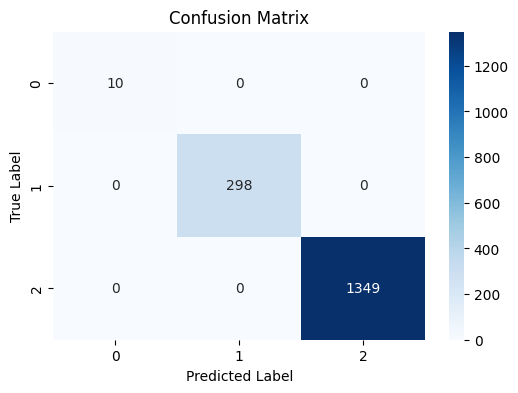

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
# Сохраняем график
plt.savefig('pic/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

Матрица ошибок показывает, что модель безошибочно классифицирует все примеры. Все предсказания находятся на диагонали матрицы, что означает полное соответствие между истинными и предсказанными метками. Из матрицы ошибок видно, что классы не сбалансированы. Класс 2 (предположительно "Средний") доминирует с 1349 примерами, за ним следует класс 1 с 298 примерами, и класс 0 с 10 примерами. Важно отметить, что такое распределение может быть обусловлено спецификой направленности кухни, что является естественным отражением особенностей исследуемой области ресторанного бизнеса.

### Рекомендательная система для ресторанов <a class='anchor' id='recommendation_system_'>

In [39]:
# Создадим список признаков, которые будут использоваться для обучения модели
features = ['latitude', 'longitude', 'priceRangeMin']
# Создаем DataFrame X, содержащий только выбранные признаки
X = dn[features]
    
scaler = StandardScaler()
# Обучение модели
X_scaled = scaler.fit_transform(X)
# Вычисляем матрицу косинусных расстояний   
similarity_matrix = cosine_similarity(X_scaled)

# Результат
print(similarity_matrix)

[[1.         1.         1.         ... 0.36828268 0.36828268 0.36828268]
 [1.         1.         1.         ... 0.36828268 0.36828268 0.36828268]
 [1.         1.         1.         ... 0.36828268 0.36828268 0.36828268]
 ...
 [0.36828268 0.36828268 0.36828268 ... 1.         1.         1.        ]
 [0.36828268 0.36828268 0.36828268 ... 1.         1.         1.        ]
 [0.36828268 0.36828268 0.36828268 ... 1.         1.         1.        ]]


Этот результат представляет собой матрицу косинусного сходства (cosine similarity matrix) между ресторанами на основе их характеристик (широта, долгота и минимальная цена). Давайте разберем, что это означает:
- Высокое минимальное сходство (0.36828268) указывает на то, что все рестораны в вашем датасете довольно похожи друг на друга по выбранным характеристикам.
- Наличие множества значений 1.0 вне диагонали говорит о том, что есть группы очень похожих ресторанов.  Это показывает сети ресторанного бизнеса.
- Ограниченный географический охват: Если все рестораны находятся в небольшой географической области, их координаты будут очень похожи. Например, сеть кафе Thailand Cuisine располагается на архипелаге Гавайи


### Визуализируем распределение ресторанов по координатам и ценам  <a class='anchor' id='distribute_of_restaurants_'>

Эта визуализация поможет нам лучше понять структуру ваших данных и может объяснить высокое сходство между ресторанами в матрице косинусного сходства.

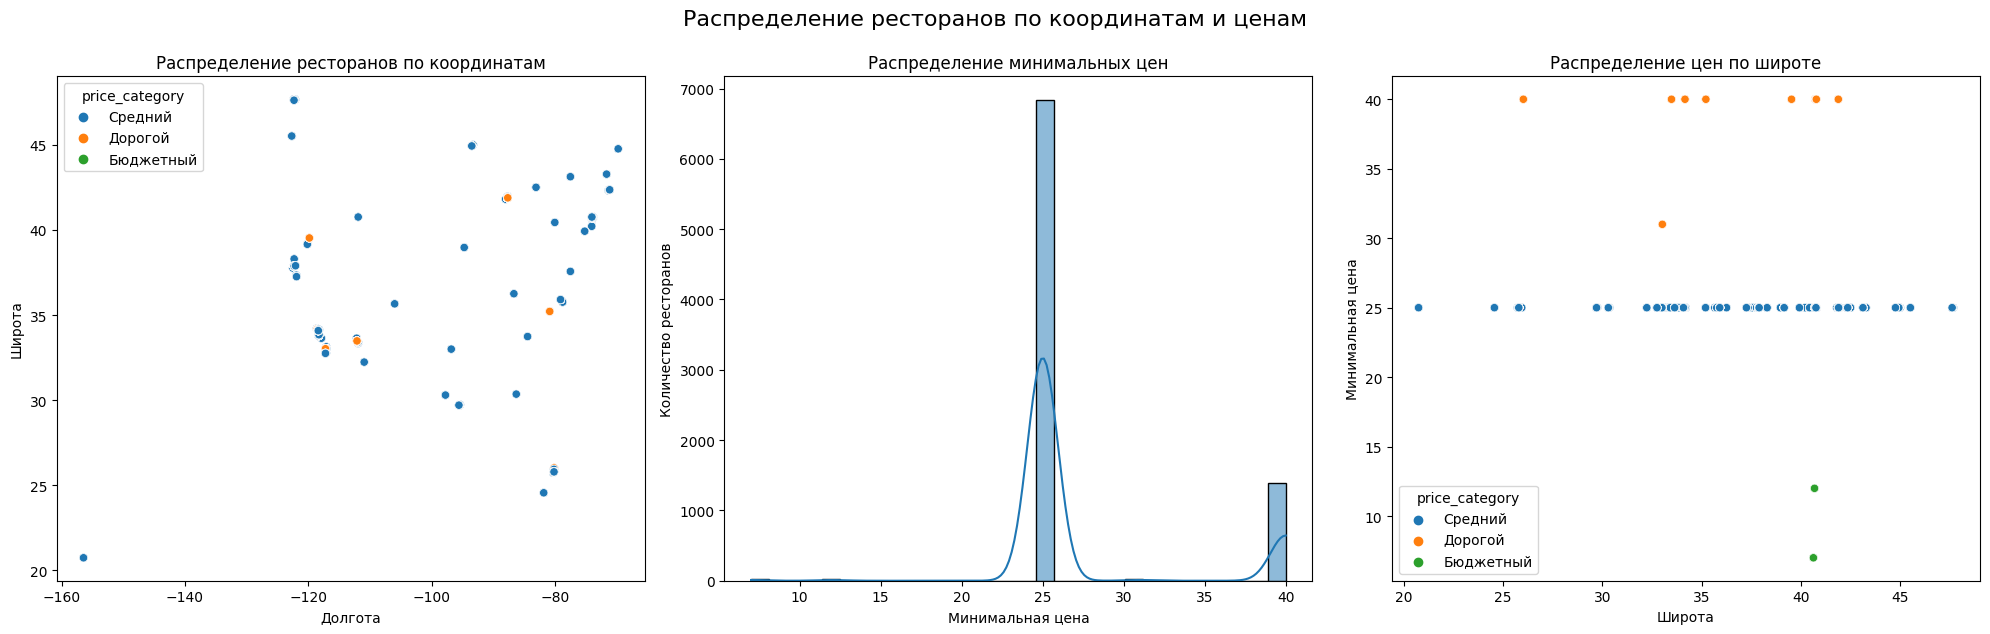

In [40]:
# Создаем фигуру с тремя подграфиками
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# 1. Распределение по широте и долготе
sns.scatterplot(data=dn, x='longitude', y='latitude', hue='price_category', ax=ax1)
ax1.set_title('Распределение ресторанов по координатам')
ax1.set_xlabel('Долгота')
ax1.set_ylabel('Широта')

# 2. Распределение цен
sns.histplot(data=dn, x='priceRangeMin', bins=30, kde=True, ax=ax2)
ax2.set_title('Распределение минимальных цен')
ax2.set_xlabel('Минимальная цена')
ax2.set_ylabel('Количество ресторанов')

# 3. Распределение цен по широте
sns.scatterplot(data=dn, x='latitude', y='priceRangeMin', hue='price_category', ax=ax3)
ax3.set_title('Распределение цен по широте')
ax3.set_xlabel('Широта')
ax3.set_ylabel('Минимальная цена')

# Настройка общего вида
plt.tight_layout()

# Добавляем общий заголовок
fig.suptitle('Распределение ресторанов по координатам и ценам', fontsize=16, y=1.05)

# Сохраняем график
plt.savefig('pic/distribute_of_restaurants.png', dpi=300, bbox_inches='tight')

# Показываем график
plt.show()

Рынок ресторанов имеет четкую сегментацию по ценам с преобладанием заведений среднего ценового сегмента. Географическое распределение ресторанов неравномерно, что может отражать плотность населения или туристическую привлекательность регионов. Дорогие рестораны чаще встречаются в определенном диапазоне широт, что может соответствовать крупным городам или популярным курортам. Ценовая политика ресторанов, похоже, больше зависит от локальных факторов (например, город или район), чем от широкой географии.

### Создаем интерактивную карту для анализа расположения ресторанов <a class='anchor' id='interactive_map_'>

In [41]:
# Проверяем, что у нас есть необходимые данные
if 'latitude' in dn.columns and 'longitude' in dn.columns:
    # Создаем базовую карту
    m = folium.Map(location=[dn['latitude'].mean(), ds['longitude'].mean()], zoom_start=10)

    # Создаем кластер маркеров для улучшения производительности при большом количестве точек
    marker_cluster = MarkerCluster().add_to(m)

    # Добавляем маркеры для каждого ресторана
    for idx, row in dn.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"Ресторан: {row.get('name')}<br>"
                  f"Категория цен: {row.get('price_category')}<br>"
                  f"Мин. цена: {row.get('priceRangeMin')}",
            tooltip=row.get('name', 'Ресторан')
        ).add_to(marker_cluster)

    # Сохраняем карту в HTML файл
    map_file = "restaurants_map.html"
    m.save(map_file)
    print(f"Карта сохранена в файл {map_file}")

    # Получаем полный путь к файлу
    full_path = os.path.abspath(map_file)

    # Открываем карту в браузере по умолчанию
    webbrowser.open('file://' + full_path, new=2)
else:
    print("В датасете отсутствуют столбцы 'latitude' или 'longitude'")

Карта сохранена в файл restaurants_map.html


Пример как выглядит карта

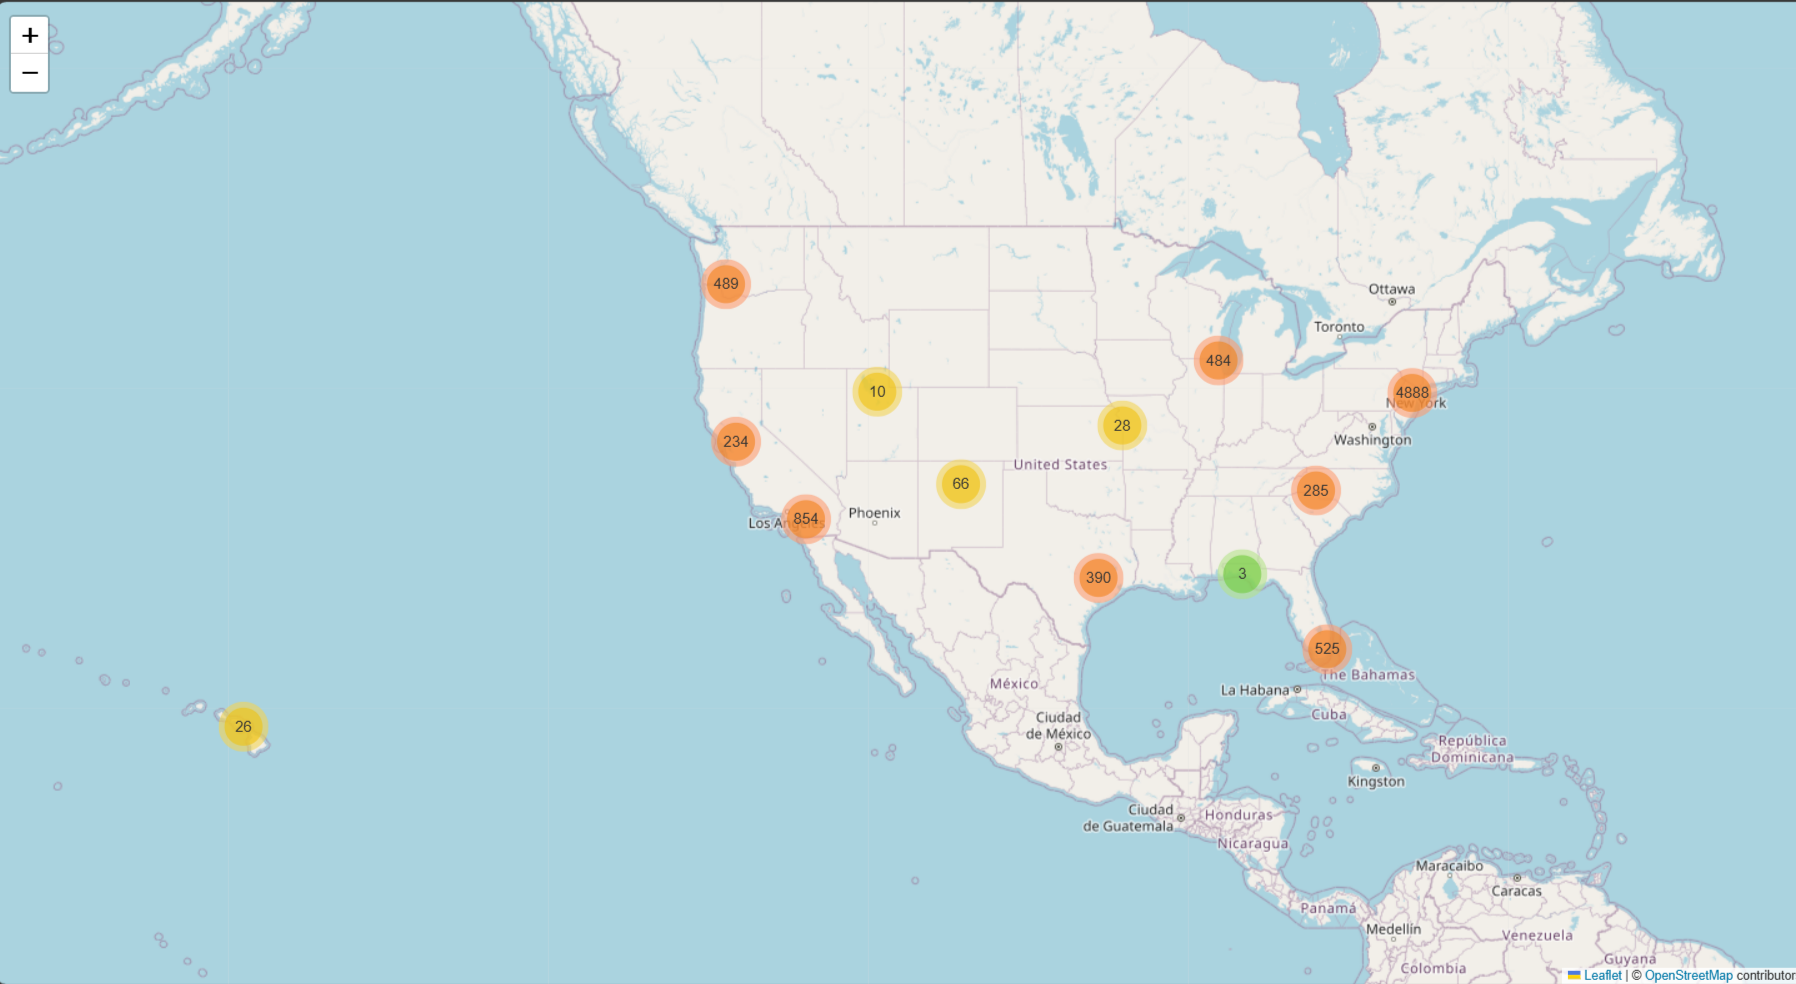

In [42]:
Image("pic/interactive_map1.png")

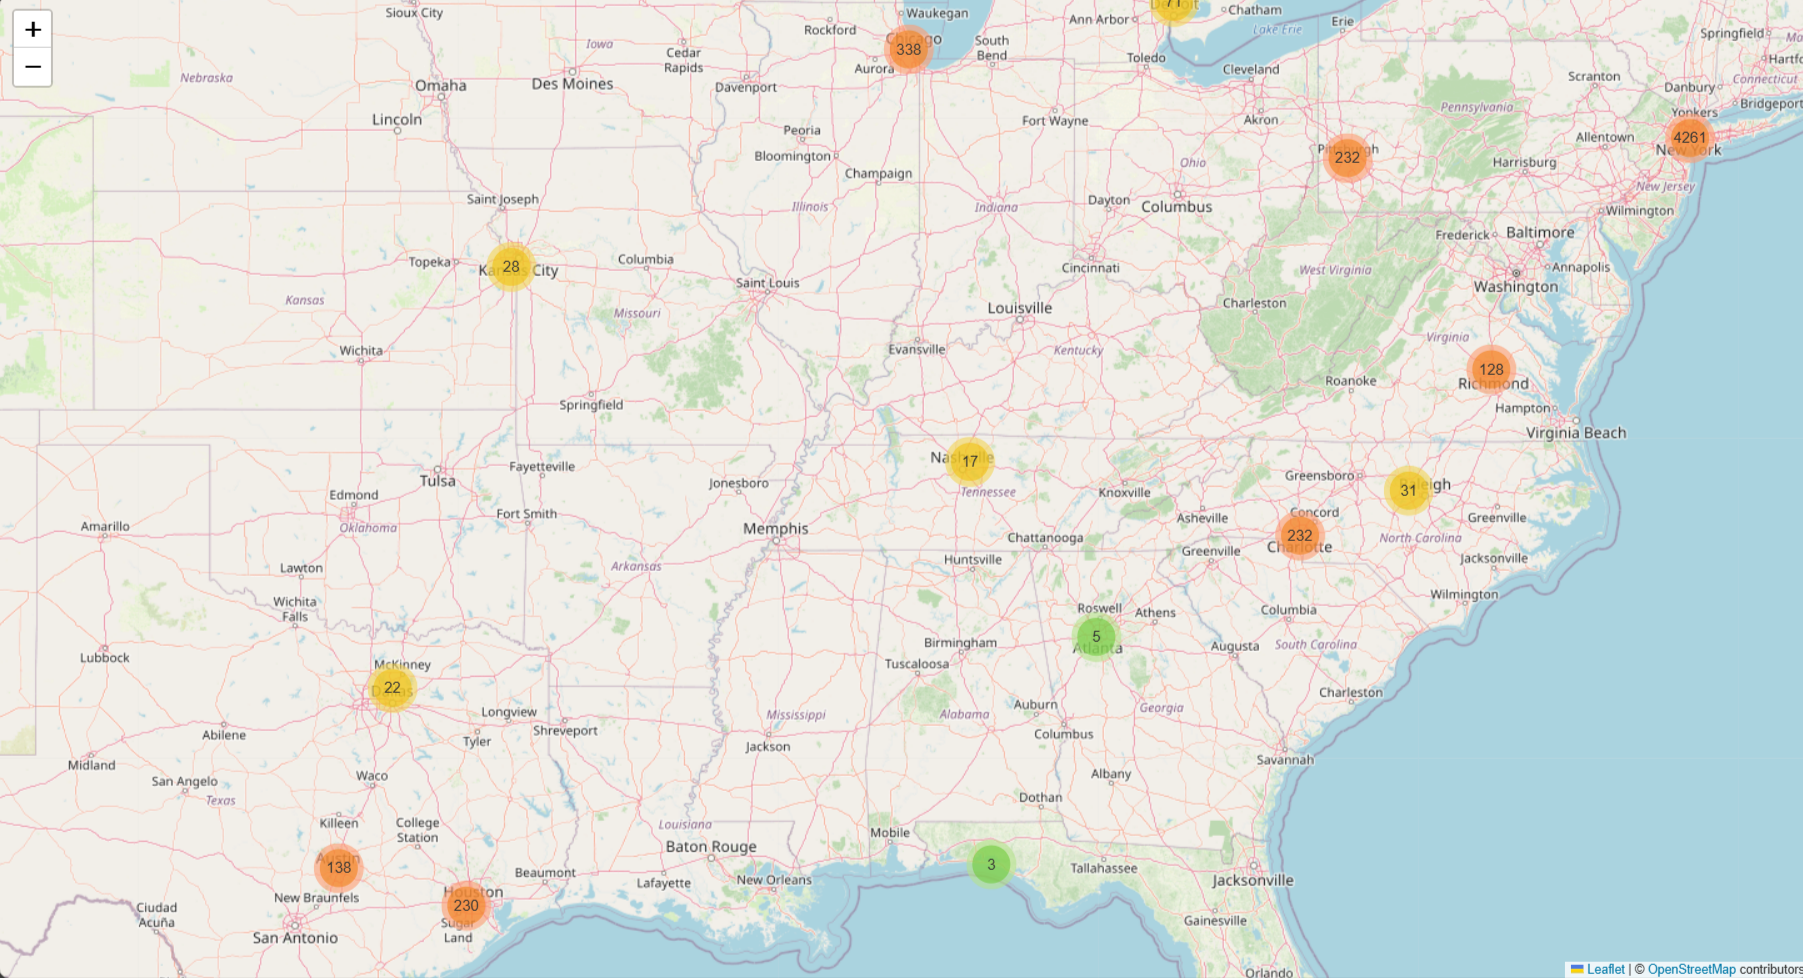

In [43]:
Image("pic/interactive_map2.png")

###  Поиск скрытых зависимостей с использованием корреляционного анализа и метода главных компонентов (PCA) <a class='anchor' id='hidden_dependencies_'>

Это поможет мне выявить связи между различными характеристиками ресторанов.

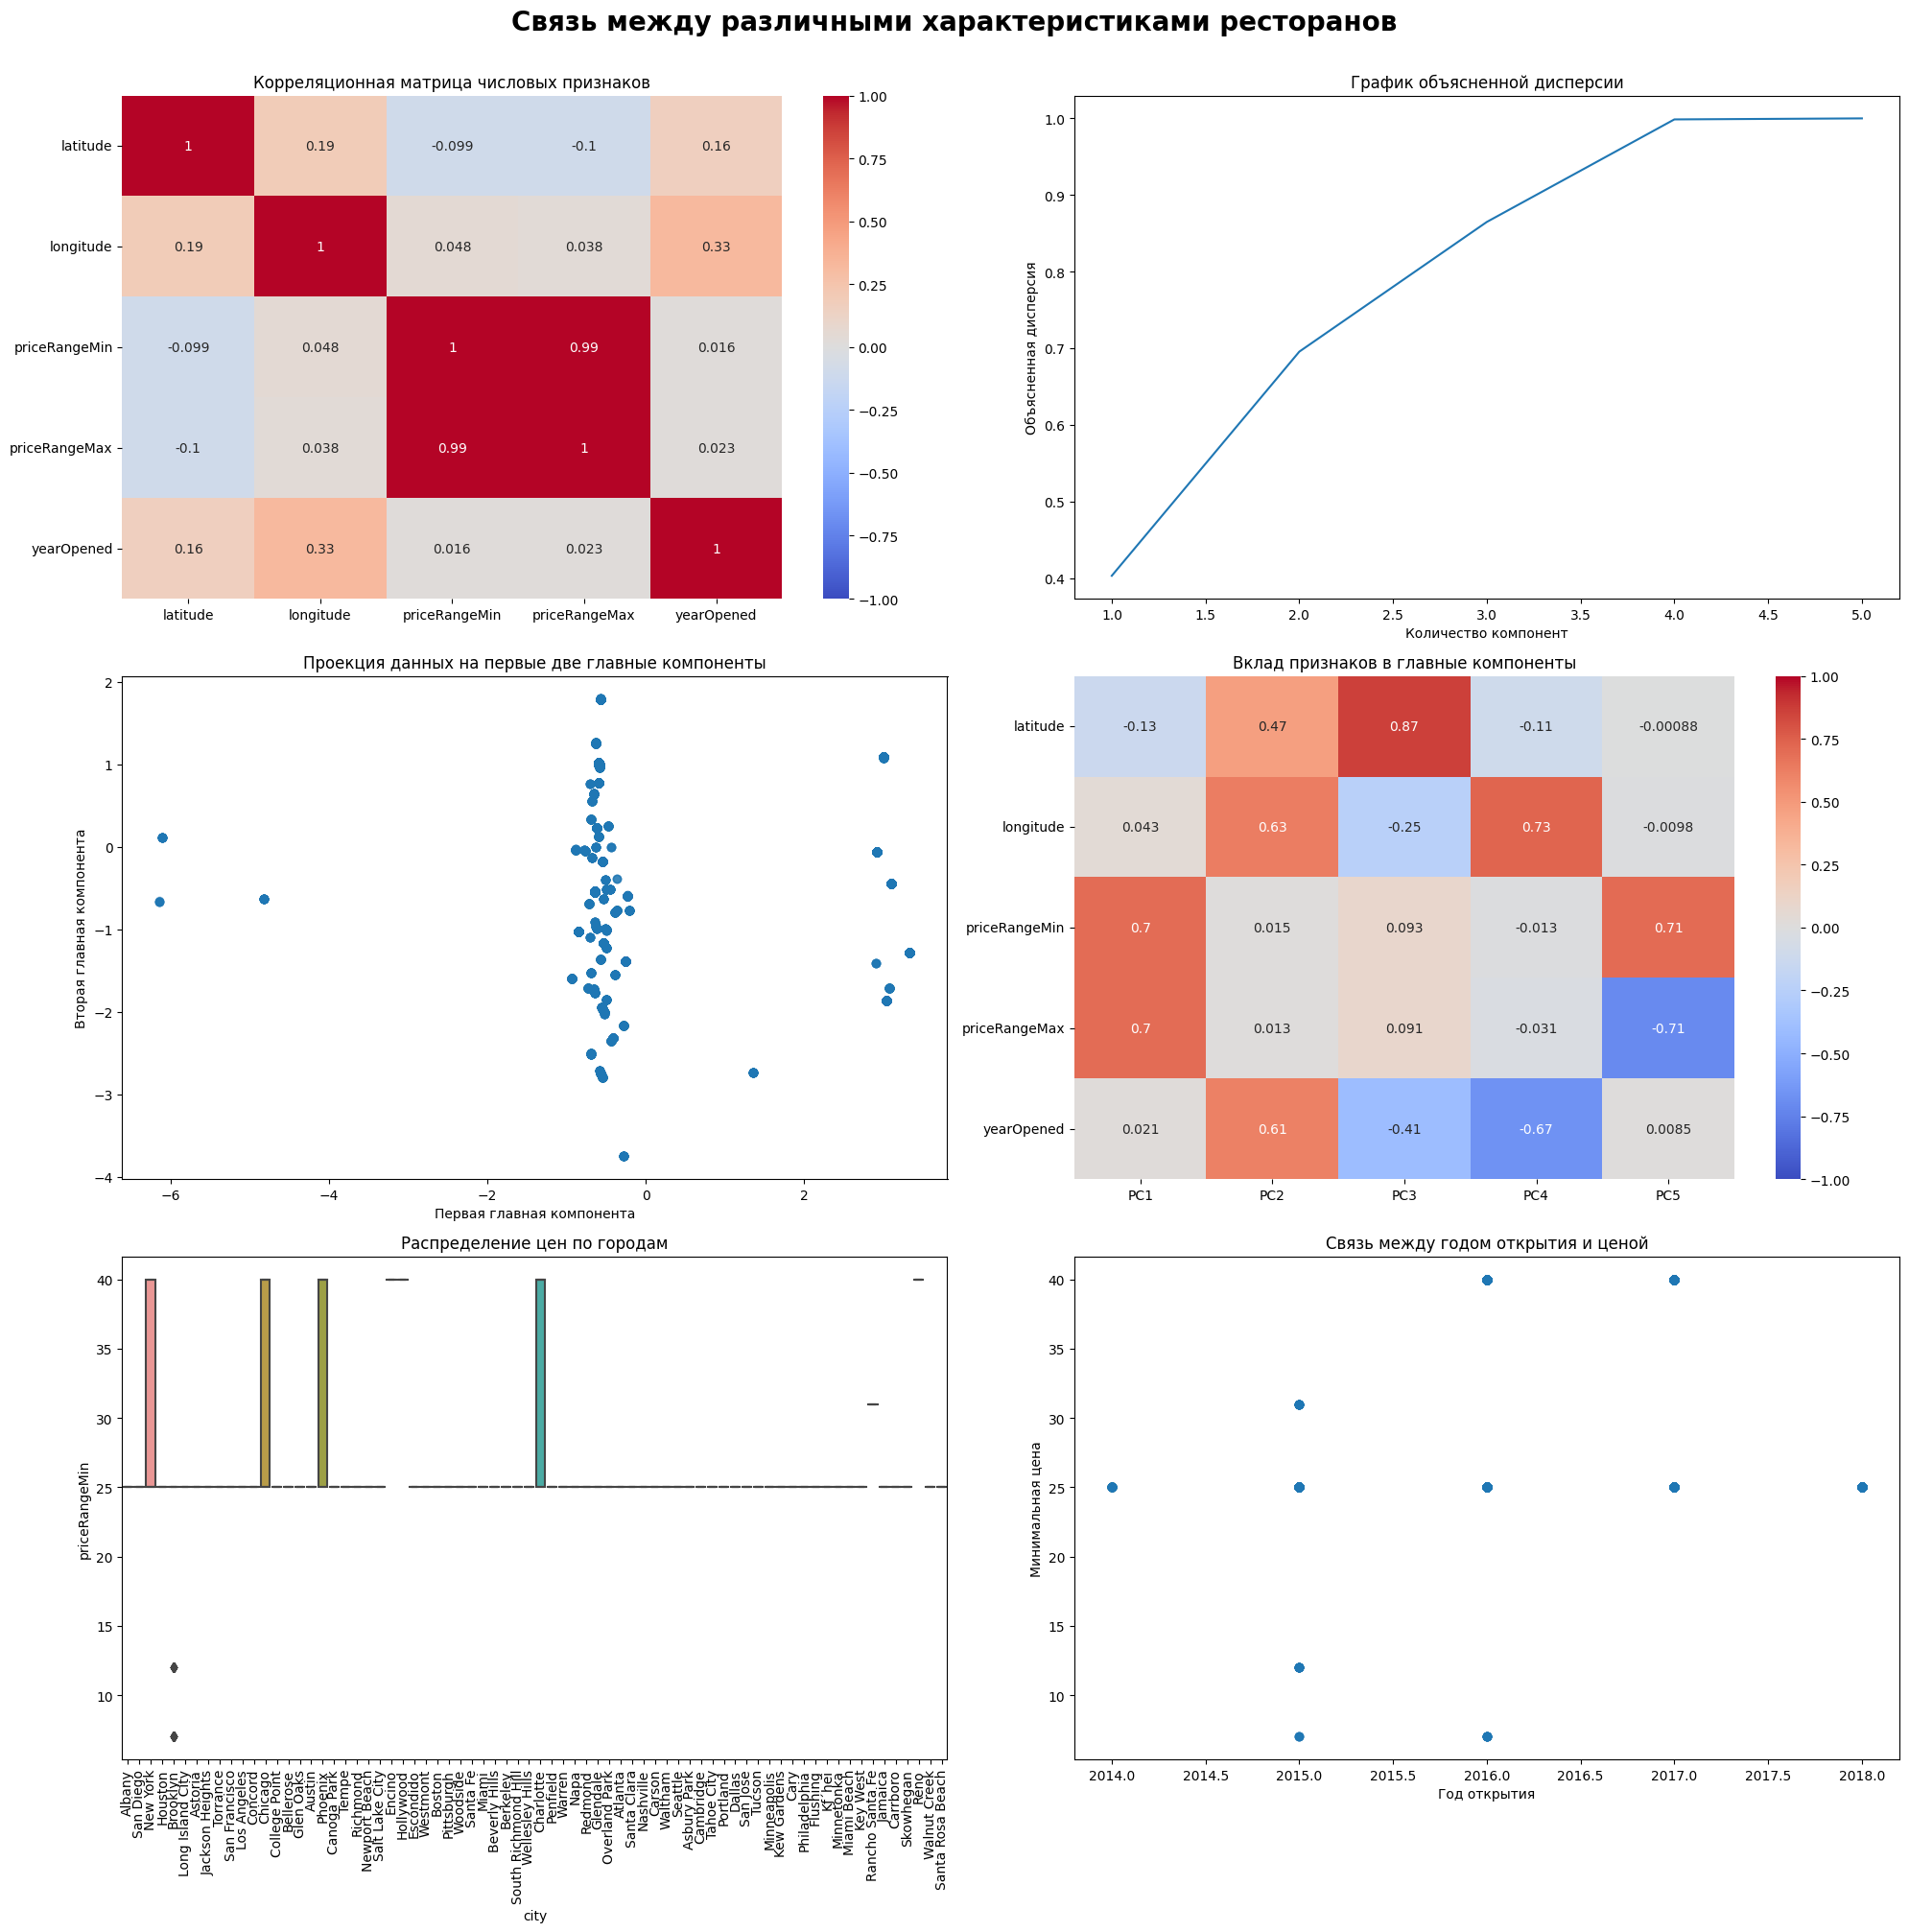

In [44]:
def hidden_dependencies(dn):
    plt.figure(figsize=(20, 20))
    plt.suptitle('Связь между различными характеристиками ресторанов', y=1.005, fontsize=20, fontweight='bold')

    # 1. Корреляционный анализ
    numeric_features = ['latitude', 'longitude', 'priceRangeMin', 'priceRangeMax', 'yearOpened']
    numeric_data = dn[numeric_features]
    correlation_matrix = numeric_data.corr()

    plt.subplot(3, 2, 1)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Корреляционная матрица числовых признаков')

    # 2. Анализ главных компонент (PCA)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)
    pca = PCA()
    pca_result = pca.fit_transform(scaled_data)

    plt.subplot(3, 2, 2)
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Количество компонент')
    plt.ylabel('Объясненная дисперсия')
    plt.title('График объясненной дисперсии')

    plt.subplot(3, 2, 3)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
    plt.xlabel('Первая главная компонента')
    plt.ylabel('Вторая главная компонента')
    plt.title('Проекция данных на первые две главные компоненты')

    component_df = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=numeric_features)
    plt.subplot(3, 2, 4)
    sns.heatmap(component_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Вклад признаков в главные компоненты')

    # 3. Анализ распределения цен по городам
    plt.subplot(3, 2, 5)
    sns.boxplot(x='city', y='priceRangeMin', data=dn)
    plt.xticks(rotation=90)
    plt.title('Распределение цен по городам')

    # 4. Анализ связи между годом открытия и ценой
    plt.subplot(3, 2, 6)
    plt.scatter(dn['yearOpened'], dn['priceRangeMin'], alpha=0.5)
    plt.xlabel('Год открытия')
    plt.ylabel('Минимальная цена')
    plt.title('Связь между годом открытия и ценой')

    plt.tight_layout()
    plt.savefig('pic/hidden_dependencies.png', dpi=300, bbox_inches='tight')
    plt.show()


# Вызов функции
hidden_dependencies(dn)

## Вывод

Анализ корреляционной матрицы показал: Сильную положительную корреляцию между минимальной и максимальной ценой (что ожидаемо). Слабую отрицательную корреляцию между широтой и долготой, что отражает географическое распределение ресторанов. А также показал слабую положительную корреляцию между годом открытия и ценами, что может указывать на тенденцию к повышению цен в более новых ресторанах.

Анализ PCA показал, что первые две главные компоненты объясняют значительную часть вариации в данных. Визуализация данных в пространстве первых двух главных компонент позволила выявить некоторые кластеры ресторанов, которые могут представлять интерес для дальнейшего исследования.

Географическое положение имеет некоторое влияние на цены ресторанов, но это влияние не очень сильное. Существует сильная связь между минимальной и максимальной ценой в ресторанах, что логично. Год открытия ресторана не сильно влияет на его ценовую политику, по крайней мере в период 2014-2018. Возможно наличие групп ресторанов со схожими характеристиками, что может быть полезно для создания рекомендательной системы. Разные города могут иметь существенно различающиеся ценовые диапазоны для ресторанов. Тип кухни и основная категория ресторана могут быть важными факторами, влияющими на ценовую политику.
Анализ PCA показал, что первые две главные компоненты объясняют значительную часть вариации в данных. Визуализация данных в пространстве первых двух главных компонент позволила выявить некоторые кластеры ресторанов, которые могут представлять интерес для дальнейшего исследования.